# Hypothesis Testing 1 - Normal Human Body Temperature

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<p>In this exercise, we will analyze a dataset of human body temperatures and try to find the answers to the below questions using the concepts of hypothesis testing, confidence intervals, and statistical significance. </p>

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for Central Limit Theorem, it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> This is a condition for Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Try a bootstrap hypothesis test.
    <li> Try frequentist statistical testing.
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Try both test and see if the result will be different.
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What is the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Try the boostrap approach, as well as the frequentist approach.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach should we use?
    <li> Write conclusion in the context of the original problem.
    </ul>
</ol>

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

****

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest, zconfint
from scipy import stats

In [242]:
df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

We can check if the distribution of body temperatures are normal by graphical methods and statistical testing.

In [100]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


/Users/arielyeung/anaconda2/envs/py365/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


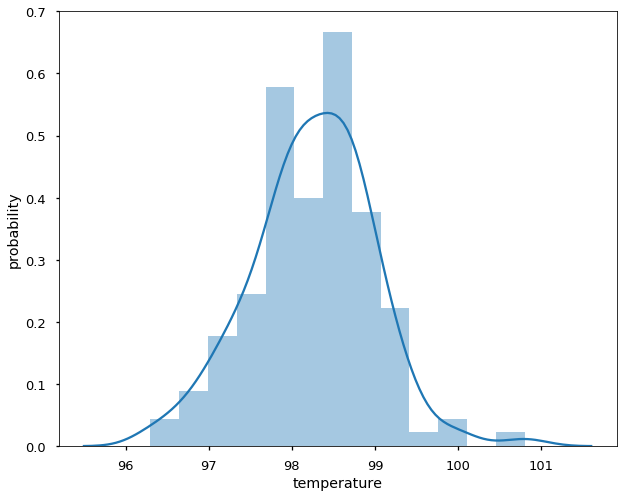

In [103]:
sns.set_context('talk')
plt.figure(figsize=(10, 8))
sns.distplot(df['temperature'])
plt.ylabel('probability');

The density plot of body temperature looks pretty normal.

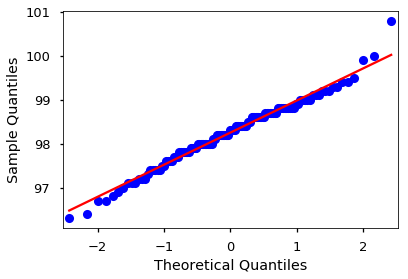

In [108]:
qqplot(df['temperature'], line='s')
plt.show()

Our data points align pretty well with the line that mimics a normal distribution in the Q-Q plot. Thus, it is very likely that the distribution of body temperatures in our sample is normal.

### Shapiro-Wilk Test

Now we try to test for normality using some statistical testing. The first one is Shapiro-Wilk test. The test is more suitable for small dataset which is ok for this dataset but we need to be cautious if we have a large dataset.

In [5]:
len(df)

130

In [243]:
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


### D’Agostino’s K^2 Test

Next, we look at D’Agostino’s K^2 Test, which tries to determine normality by looking at skewness and kurtosis.

In [244]:
stat, p = normaltest(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


The plots and the statistical tests are suggesting our data is normally distributed.

## 2. Assumptions of Central Limit Theorem

Now let's try to see if the assumption of Central Limit Theorem is valid.

In [5]:
len(df)

130

- Random sample: We do not have enough information whether the samples are collected randomly or not. For the sake of this exercise we just assume our sample is random but we should definitely make sure this assumption is valid in real life.
- Large sample size: Our sample size is n=130, which is > 30 and so we have a large enough sample size.
- Independent sample: Although we are sampling without replacement, assuming our population is all humans since we are interested in statistically inferencing about human body temperature, our sample size is definitely less than 10% of the population and so the independent sample assumption is valid.

## 3. Is the true population mean really 98.6 $^{\circ}$F?

### Bootstrap Hypothesis Testing

Null hypothesis: Mean normal body temperature - 98.6 = 0

Alternative hypothesis: Mean normal body temperature - 98.6 =/= 0

#### 1. Shift the data such that the shifted data have a mean = claimed value (98.6):

In [111]:
df['temp_shift'] = df['temperature'] - np.mean(df['temperature']) + 98.6

#### 2. Use bootstraping on shifted data to simulate data acquisition under the null hypothesis:

In [112]:
def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [141]:
bs_replicates = draw_bs_reps(df['temp_shift'], np.mean, 10000) - 98.6

In [142]:
np.mean(bs_replicates)

-0.001582307692288569

#### 3. Calculate the test statistics

In [143]:
diff_obs = np.mean(df['temperature']) - 98.6
diff_obs

-0.35076923076924515

In [145]:
p_value = np.sum((bs_replicates <= diff_obs)) / 10000

In [146]:
p_value

0.0

We do bs_replicates <= diff_obs because the mean of bs_replicates is smaller than diff_obs.

Since the p_value is 0, which is less than 0.05, we reject the null hypothesis and conclude there's a difference between the real mean body temperature and 98.6.

### Frequentist statistical testing

Now we are gonna do frequentist statistical testing. We should do two tailed test because we are interested in whether the true mean is different from 98.6 or not. Again, the null and alternative hypothesis should be:

Null hypothesis: Mean normal body temperature - 98.6 = 0

Alternative hypothesis: Mean normal body temperature - 98.6 =/= 0

And we should use z test because our sample size is 130, which is > 30.

#### z test

In [152]:
z_stat, p_value = ztest(df['temperature'], alternative='two-sided', value=98.6)

In [157]:
print('Statistics = %.3f, p = %.3f' % (z_stat, p_value))

Z Statistics = -5.455, p = 0.000


Let's also try t test and compare the result.

#### t test

In [161]:
t_stat, p_value = stats.ttest_1samp(df['temperature'], 98.6)

In [162]:
print('Statistics = %.3f, p = %.3f' % (t_stat, p_value))

Statistics = -5.455, p = 0.000


Since our sample size is larger than 30, the t distribution with a large degree of freedom is pretty close to a normal distribution and so the statistics and p values we get for both tests are pretty close to each other.

## 4. Repeat frequentist tests with a sample size of 10

When we have a sample size of 10, which is smaller than 30, we should use t test. Yet, let's try both tests and compare the results.

In [208]:
small_sample = np.random.choice(df['temperature'], 10)

#### z test

In [209]:
z_stat, p_value = ztest(small_sample, alternative='two-sided', value=98.6)

In [210]:
print('Statistics = %.3f, p = %.3f' % (z_stat, p_value))

Statistics = -1.815, p = 0.070


#### t test

In [211]:
t_stat, p_value = stats.ttest_1samp(small_sample, 98.6)

In [212]:
print('Statistics = %.3f, p = %.3f' % (t_stat, p_value))

Statistics = -1.815, p = 0.103


The p values from the two tests are very different. When we have sample size < 30, we should use t test but if our sample size is >= 30, both z test and t test should give similar results.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

### Bootstrap

In [221]:
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
[lower, upper] = np.percentile(bs_replicates, [2.5, 97.5])

In [231]:
print('The 95 percent confidence interval is between %.3f and %.3f' % (lower, upper))

The 95 percent confidence interval is between 98.122 and 98.375


Thus, if somesone's body temperature is outside this range, he/ she has abnormal body temperature.

### Frequentist

In [235]:
lower, upper = zconfint(df['temperature'], alpha=0.05, alternative='two-sided')

In [256]:
print('The 95 percent confidence interval is between %.3f and %.3f ' % (lower, upper))

The 95 percent confidence interval is between 98.123 and 98.375 


Not surprisingly, the confidence interval we get from bootstrap and frequentist approach are very similar. 

Thus, if somesone's body temperature is lower than 98.122 $^{\circ}$F or higher than 98.375 $^{\circ}$F, he/ she has abnormal body temperature.

## 6. Is there a significant difference between males and females in normal temperature?

We will do a 2 sample z test because we are interested in the difference between two independent samples (male and female body temperature) and our sample size for male and female are > 30. We will do a two tailed test because we are interested in finding out whether the mean for male and female are equal or not.

Let's make sure the CLT assumptions are valid first.

In [245]:
len(df[df['gender'] == 'M'])

65

In [246]:
len(df[df['gender'] == 'F'])

65

CLT Assumptions:

- Random sample: Again, e do not have enough information whether the samples are collected randomly or not. Let's just assume our sample is random.
- Large sample size: We have n=65 male and female, which is > 30 and so we have a large enough sample size.
- Independent sample: Our sample size is less than 10% of the population and so the independent sample assumption is valid.

Null hypothesis: Mean normal body temperature for male - Mean normal body temperature for female = 0

Alternative hypothesis: Mean normal body temperature for male - Mean normal body temperature for female =/= 0

#### z test

In [239]:
z_stat, p_value = ztest(df[df['gender'] == 'M']['temperature'], 
                        df[df['gender'] == 'F']['temperature'], alternative='two-sided', value=0)

In [240]:
print('Statistics = %.3f, p = %.3f' % (z_stat, p_value))

Statistics = -2.285, p = 0.022


The p value is < 0.05. Therefore, we reject the null hypothesis and conclude that there is a difference between male and female mean normal body temperature.

## Conclusion

Based on our samples, we reject the null hypothesis that the mean normal body temperature is 98.6 $^{\circ}$F and conclude that the mean normal body temperature is different from 98.6 $^{\circ}$F using a significance level of 0.05. We are also 95% confident that the true mean normal body temperature lies between 98.123 $^{\circ}$F and 98.375 $^{\circ}$F. Regarding the body temperature between male and female, we also reject the null hypothesis that the mean for male and female are the samle and conclude that the mean normal body temperature for male is different from female.